In [1]:
# NumPy library: allows for numerical computing
import numpy as np

# pandas library: used for data manipulation and analysis
import pandas as pd

# random library: implements pseudo-random number generators
from random import uniform as rand

# matplotlib library: plots everything
import matplotlib.pyplot as plt
%matplotlib inline

_________

# Case II

__Best Asset Management (BAM) is a top-notch asset management company with operations worldwide. Your team got an internship opportunity and your first assignment is to help in the advisory process for a wealthy investor, Mr. Gonzalez.__

__
Mr. Gonzalez approached BAM for the development of an investment strategy more adjusted to his risk-return profile. Your internship supervisor, Mrs. Crusoe, wants you to conduct a comprehensive analysis on what might be a good asset allocation for this investor.__

In [2]:
# Import the excel file
data = pd.read_excel('./data_case.xlsx', index_col='Date')

# Order the columns in alphabetical order
data = data.reindex(sorted(data.columns), axis=1).drop(pd.Timestamp('2004-12-31'))

# Show the data
data.head()

,Commodities,Equity,Fixed income,Hedge Funds,Real Estate
Date,,,,,
2005-01-07,0.061548,0.014354,0.019900,0.028100,-0.007989
2005-01-14,0.037780,-0.003776,0.003577,-0.003210,-0.007760
2005-01-21,0.007729,-0.007996,0.001278,0.001171,0.009977
2005-01-28,-0.013148,0.006571,0.002871,0.001559,-0.018529
2005-02-04,-0.009279,0.033628,0.012232,0.017711,0.032902


__ For your assignment Mrs. Crusoe gave you weekly data on several asset classes that she considers appropriate for the investor and raised some questions that she believes will strengthen your analysis.__

__The risk-free rate is 3%.__

In [3]:
# Define the risk-free variable
r_f = 0.03

__________________

## Question 1

__ How did each of the asset classes performed throughout the whole sample period?__

In [4]:
# Create table, DataFrame, with historical indicators
sample_indicators = pd.DataFrame({'mean': data.mean()*52, 
                                  'std': data.std() * np.sqrt(52),
                                  'min': data.min(),
                                  'max': data.max()})

# Show table
sample_indicators

,max,mean,min,std
Commodities,0.143364,0.057365,-0.182563,0.214668
Equity,0.109478,0.093698,-0.179928,0.163640
Fixed income,0.059763,0.044597,-0.033792,0.070766
Hedge Funds,0.042825,0.023104,-0.051908,0.097868
Real Estate,0.174583,0.086825,-0.143572,0.208031


In [5]:
# Get covariance variance matrix
S = data.cov()*(365.25/7)

# Show it
S

,Commodities,Equity,Fixed income,Hedge Funds,Real Estate
Commodities,0.046241,0.014588,-0.000341,0.005410,0.012579
Equity,0.014588,0.026870,0.000484,0.008068,0.027308
Fixed income,-0.000341,0.000484,0.005025,0.004740,0.000799
Hedge Funds,0.005410,0.008068,0.004740,0.009611,0.006834
Real Estate,0.012579,0.027308,0.000799,0.006834,0.043426


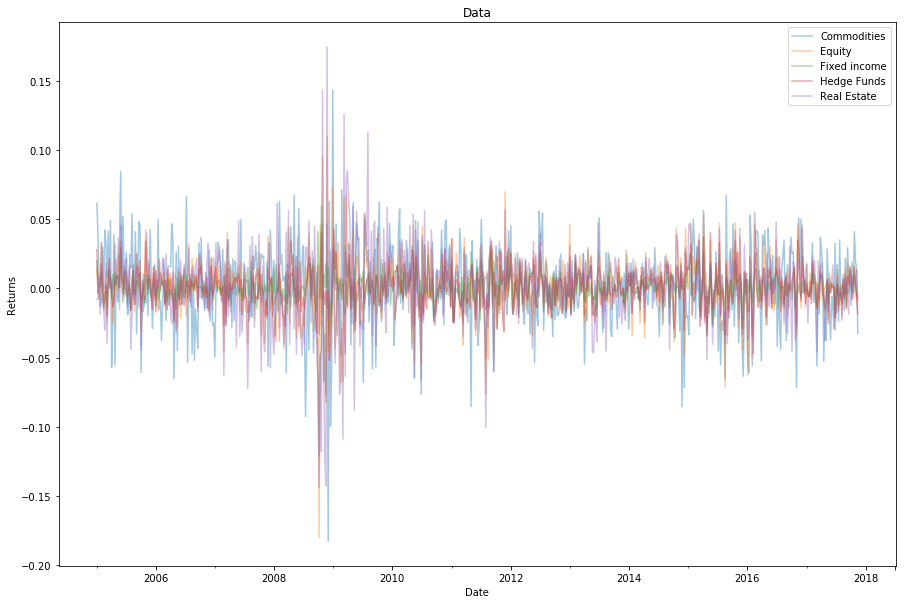

In [6]:
# Visualize the returns
data.plot(alpha=.4, figsize = (15,10), title='Data')

# Add label
plt.ylabel('Returns');

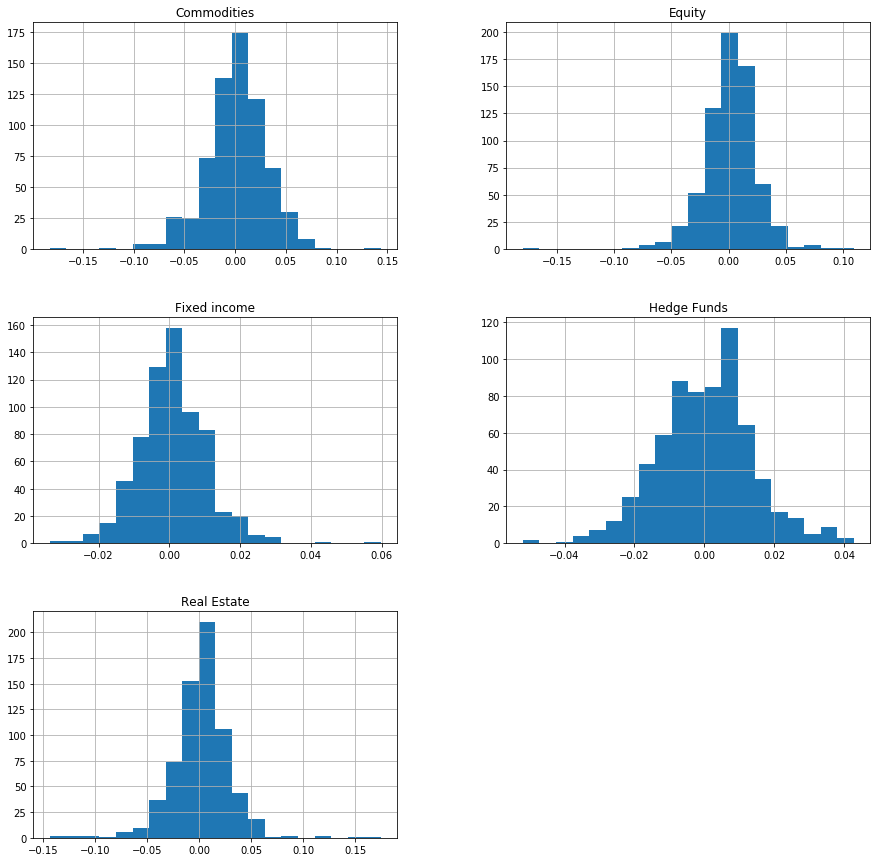

In [7]:
# Plot a histogram using 20 bins of the 5 asset classes
pd.DataFrame.hist(data, bins=20, figsize = (15,15));

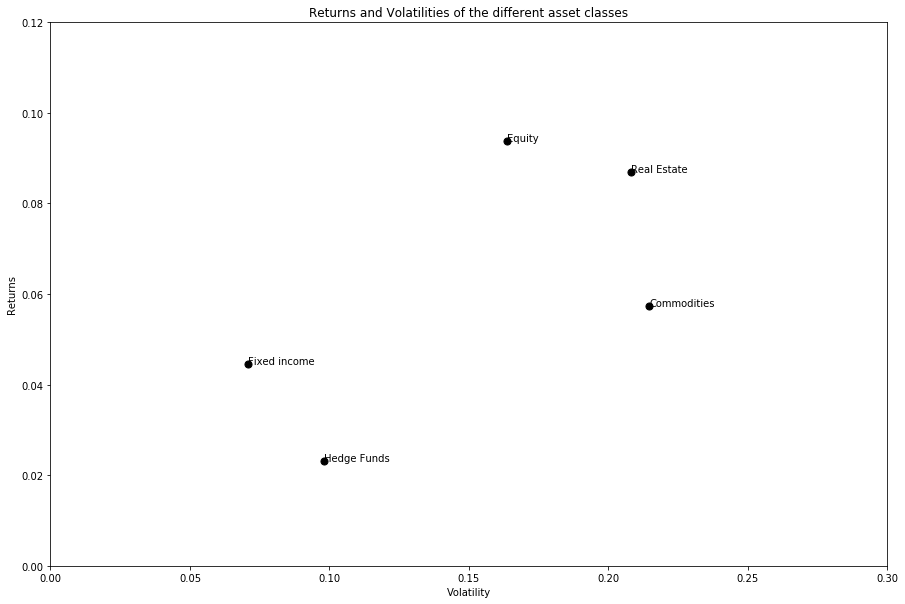

In [8]:
# Plot the Returns Volatility scatter
fig, ax = plt.subplots(figsize = (15,10))
ax.scatter(sample_indicators['std'], sample_indicators['mean'], marker="o",color='xkcd:black',s=50)

# Add the labels to each class
for i, txt in enumerate(data.columns.tolist()):
    ax.annotate(txt, (sample_indicators['std'].tolist()[i],sample_indicators['mean'].tolist()[i]))

# Define the limits for the graph
plt.ylim((0.00,0.12))
plt.xlim((0.00,0.3))

# Define the labels
plt.title('Returns and Volatilities of the different asset classes')
plt.xlabel('Volatility')
plt.ylabel('Returns');

___________

## Question 2

__ If there are no restrictions on short sales what would be the tangency portfolio? And if the investor is restricted on short sales? Compare the two portfolios.__

First, with no restriction:

$$ weights_{T_{nr}} = \frac{S^{-1}\{E(r)-r_f\}}{Sum\left[S^{-1}\{E(r)-r_f\}\right]} $$

In [9]:
# Get weights of tangent portfolio with no restrictions:
w_T_nr = np.dot(np.linalg.inv(S), sample_indicators['mean'] - r_f)/sum(np.dot(np.linalg.inv(S), sample_indicators['mean']- r_f))

# Display weights
print(w_T_nr)

[ 0.03954551  1.00296901  1.93416404 -1.73176868 -0.24490987]


In [10]:
# Get expected returns of the tangency portfolio
E_r_T_nr = np.dot(w_T_nr, sample_indicators['mean'])

# Get standard deviation of the tangency portfolio
std_T_nr = np.sqrt(np.dot(np.transpose(w_T_nr), np.dot(S, w_T_nr)))

# Print E(r) and std
print('E(r):', E_r_T_nr)
print('σ:', std_T_nr)

E(r): 0.121227130535
σ: 0.105719695557


<br>

Second, with restrictions:

In [ ]:
# Set Monte Carlo approach with 1M portfolios
num_portfolios = 10000000

# Set up table to hold results
results = np.zeros((4+len(data)-1,num_portfolios))

# Loop through all the portfolios
for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.array(np.random.uniform(-2,2,5))
    
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(sample_indicators['mean'] * weights)
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights)))
 
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    
    #store Sharpe Ratio
    results[2,i] = (results[0,i]-r_f) / results[1,i]
    
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]

